In [2]:
pip install fitter

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
from ucimlrepo import fetch_ucirepo 

abalone = fetch_ucirepo(id=1) 
  
# data (as pandas dataframes) 
data = abalone.data.features 
salida = abalone.data.targets 

In [5]:
import numpy as np
import pandas as pd
from fitter import Fitter, get_common_distributions, get_distributions
data

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [6]:
import plotly.express as px
fig = px.histogram(x=data['Diameter'], nbins=30)
fig.show()

In [7]:
get_distributions()
f=Fitter(data['Diameter'], distributions=["norm", "gamma", "chi2", "powerlaw"])

In [8]:
f.fit()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,90.292968,56.469983,69.144680,inf,0.078799,5.254145e-23
chi2,99.920137,63.634586,82.646632,inf,0.089114,2.591714e-29
gamma,100.925148,56.676524,75.688570,inf,0.080919,3.075616e-24
powerlaw,246.668584,-61.899121,-42.887076,inf,0.254911,9.104656e-240


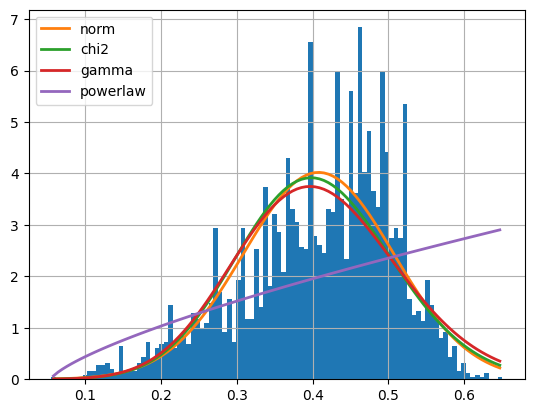

In [9]:
f.summary()

In [10]:
resultado = f.get_best(method="aic")
resultado

{'powerlaw': {'a': 1.7347839763612962,
  'loc': 0.05467068059931991,
  'scale': 0.5953293194006802}}

In [11]:
len(data["Diameter"])

4177

In [12]:
from scipy.stats import powerlaw
aux = powerlaw.rvs(a=1.7347839763612962,loc=0.05467068059931991,scale=0.5953293194006802, size=4177)

In [13]:
data["Diameter_sinteticos"]=aux

In [14]:
fig_synt=px.histogram(x=data["Diameter_sinteticos"])
fig_synt.show()

La anterior gráfica está hecha con powerlaw. Esta data sintética no sirve, debido a que no es similar a la original.

In [15]:
resultado2 = f.get_best(method="sumsquare_error")
resultado2

{'norm': {'loc': 0.40788125448886764, 'scale': 0.09922798609936374}}

In [16]:
from scipy.stats import norm
aux = norm.rvs(loc=0.40788125448886764, scale=0.09922798609936374, size=4177)

In [17]:
data["Diameter_sinteticos_norm"] = aux
fig_synt_norm = px.histogram(data["Diameter_sinteticos_norm"], nbins=300)
fig_synt_norm.show()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
burr,60.915420,53.304929,78.654323,inf,0.019177,0.091436
mielke,60.915423,53.304786,78.654181,inf,0.019177,0.091436
skewnorm,62.109643,49.880971,68.893017,inf,0.027255,0.003960
gengamma,63.060396,69.245501,94.594895,inf,0.032217,0.000335
exponweib,63.330233,69.783804,95.133198,inf,0.033039,0.000214


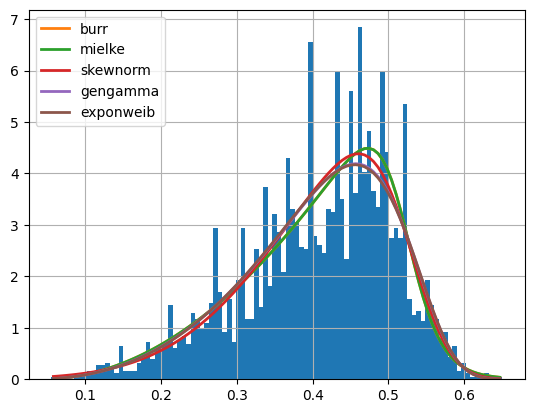

In [18]:
f=Fitter(data["Diameter"], distributions=get_distributions())
f.fit()
f.summary()

In [19]:
resultado3 = f.get_best(method="sumsquare_error")
resultado3

{'burr': {'c': 21.40433910878557,
  'd': 0.13961365622607871,
  'loc': 0.041950596311078364,
  'scale': 0.48236049600533665}}

In [20]:
from scipy.stats import burr
aux2=burr.rvs(resultado3["burr"]["c"], resultado3["burr"]["d"], resultado3["burr"]["loc"], resultado3["burr"]["scale"], size=4177)

In [21]:
data["Diameter_sinteticos_burr"]=aux2

In [34]:
fig_synt_burr = px.histogram(x=data["Diameter_sinteticos_burr"], nbins=200)
fig_synt_burr.show()

La gráfica de diámetro con datos sintéticos es parecida a la gráfica original, siguienda la distribución "burr". Respeta los máximos y los mínimos (0.1, 0.6) en el eje X para la cantidad de 4177 valores, aunque cuente con algunos valores atípicos antes y después de estos límites.

{'burr': {'c': 21.93761653045092,
  'd': 0.14726239727277787,
  'loc': 0.05346202207145154,
  'scale': 0.6085693295022978}}

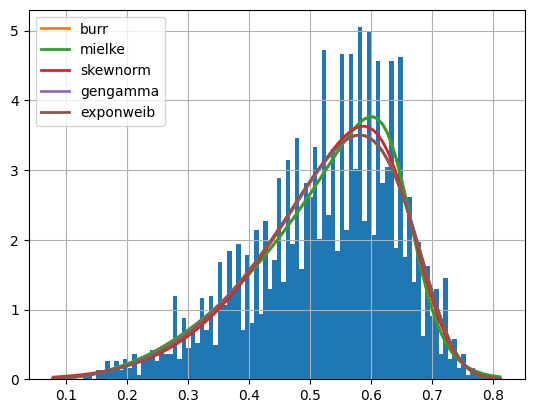

In [24]:
f=Fitter(data["Length"], distributions=get_distributions())
f.fit()
f.summary()
resultado4 = f.get_best(method="sumsquare_error")
resultado4

In [33]:
from scipy.stats import burr
aux=burr.rvs(resultado4["burr"]["c"], resultado4["burr"]["d"], resultado4["burr"]["loc"], resultado4["burr"]["scale"], size=4177)
data["Length_sinteticos"]=aux
fig_synt = px.histogram(x=data["Length_sinteticos"], nbins=200)
fig_synt.show()

La gráfica de longitud con datos sintéticos es parecida a la gráfica original, siguienda la distribución "burr". Respeta los máximos y los mínimos (0.1, 0.8) en el eje X para la cantidad de 4177 valores con una cantidad mayor de datos para +/- 0.6. Esta gráfica tiene una distribución inclinada hacia la derecha.

{'burr': {'c': 12.860310742015425,
  'd': 0.26797292652866617,
  'loc': -0.007052355768943315,
  'scale': 0.18223001006934036}}

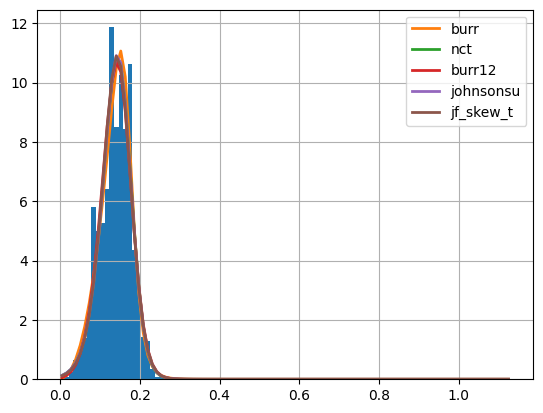

In [27]:
f=Fitter(data["Height"], distributions=get_distributions())
f.fit()
f.summary()
resultado5 = f.get_best(method="sumsquare_error")
resultado5

In [32]:
aux=burr.rvs(resultado5["burr"]["c"], resultado5["burr"]["d"], resultado5["burr"]["loc"], resultado5["burr"]["scale"], size=4177)
data["Height_sinteticos"]=aux
fig_synt = px.histogram(x=data["Height_sinteticos"], nbins=200)
fig_synt.show()

La gráfica de altura con datos sintéticos es parecida a la gráfica original, siguienda la distribución "burr". Respeta los máximos y los mínimos (0.0, 0.25) en el eje X para la cantidad de 4177 valores, con una cantidad mayor de datos para +/- 0.15.

{'mielke': {'k': 1.2397119077630632,
  's': 6.534658450522036,
  'loc': 0.001428042771010725,
  'scale': 0.3981826226254768}}

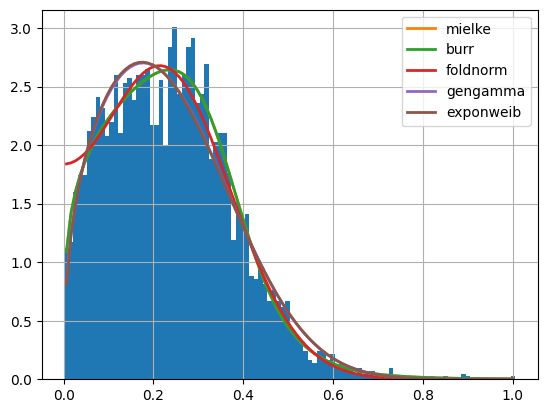

In [29]:
f=Fitter(data["Shell_weight"], distributions=get_distributions())
f.fit()
f.summary()
resultado6 = f.get_best(method="sumsquare_error")
resultado6

In [31]:
from scipy.stats import mielke

aux=mielke.rvs(resultado6["mielke"]["k"], resultado6["mielke"]["s"], resultado6["mielke"]["loc"], resultado6["mielke"]["scale"], size=4177)
data["Shell_weight_sinteticos"]=aux
fig_synt = px.histogram(x=data["Shell_weight_sinteticos"], nbins=200)
fig_synt.show()

La gráfica de peso de la concha con datos sintéticos es parecida a la gráfica original, siguienda la distribución "mielke". Respeta los máximos y los mínimos (0.0, 1) en el eje X para la cantidad de 4177 valores, aunque cuenta con algunos valores atípicos después del máximo como es el marcado en 1.15. Esta gráfica tiene una distribución inclinada hacia la izquierda.

{'mielke': {'k': 1.1666425185326041,
  's': 6.110810320863873,
  'loc': 0.0009471221675081588,
  'scale': 0.615305462559811}}

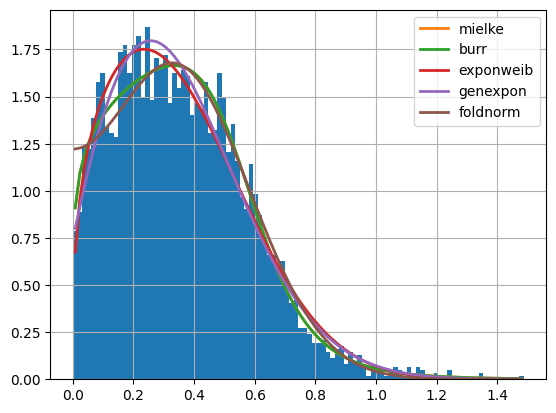

In [35]:
f=Fitter(data["Shucked_weight"], distributions=get_distributions())
f.fit()
f.summary()
resultado7 = f.get_best(method="sumsquare_error")
resultado7

In [37]:
aux=mielke.rvs(resultado7["mielke"]["k"], resultado7["mielke"]["s"], resultado7["mielke"]["loc"], resultado7["mielke"]["scale"], size=4177)
data["Shucked_weight_sinteticos"]=aux
fig_synt = px.histogram(x=data["Shucked_weight_sinteticos"], nbins=200)
fig_synt.show()

La gráfica de peso sin cascarón con datos sintéticos es parecida a la gráfica original, siguienda la distribución "mielke". Respeta los máximos y los mínimos (0.0, 1.4) en el eje X para la cantidad de 4177 valores, aunque cuenta con algunos valores atípicos después del máximo como los marcados en 1.63 y en 1.96. Esta gráfica tiene una distribución inclinada hacia la izquierda.

{'mielke': {'k': 1.1673241190629762,
  's': 6.3557679488653385,
  'loc': 0.00044998128321851425,
  'scale': 0.3120248404062259}}

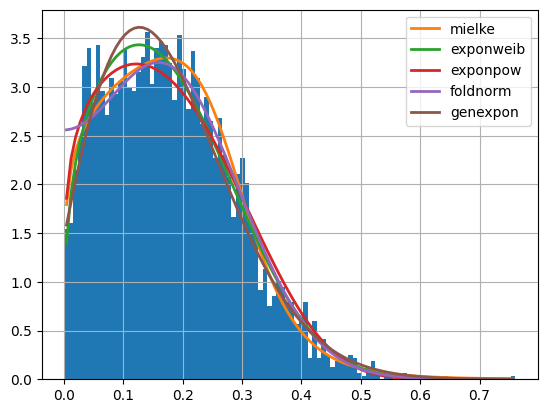

In [38]:
f=Fitter(data["Viscera_weight"], distributions=get_distributions())
f.fit()
f.summary()
resultado8 = f.get_best(method="sumsquare_error")
resultado8

In [40]:
aux=mielke.rvs(resultado8["mielke"]["k"], resultado8["mielke"]["s"], resultado8["mielke"]["loc"], resultado8["mielke"]["scale"], size=4177)
data["Viscera_weight_sinteticos"]=aux
fig_synt = px.histogram(x=data["Viscera_weight_sinteticos"], nbins=200)
fig_synt.show()

La gráfica de peso de la víscera con datos sintéticos es parecida a la gráfica original, siguienda la distribución "mielke". Respeta los máximos y los mínimos (0.0, 1.4) en el eje X para la cantidad de 4177 valores, aunque cuenta con algunos valores atípicos después del máximo como el marcado en 0.86. Esta gráfica tiene una distribución inclinada hacia la izquierda.

{'mielke': {'k': 1.1945755620489997,
  's': 6.734769753416561,
  'loc': 0.001847626868732472,
  'scale': 1.423543237171593}}

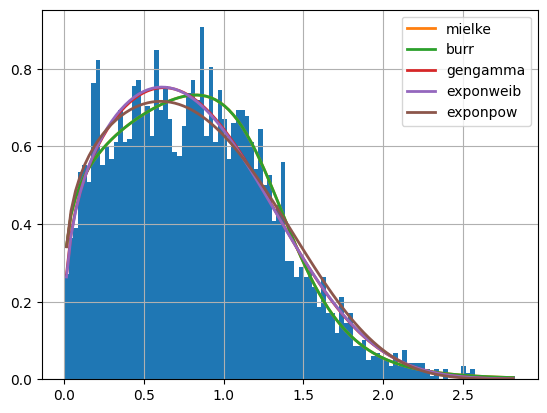

In [41]:
f=Fitter(data["Whole_weight"], distributions=get_distributions())
f.fit()
f.summary()
resultado9 = f.get_best(method="sumsquare_error")
resultado9

In [42]:
aux=mielke.rvs(resultado9["mielke"]["k"], resultado9["mielke"]["s"], resultado9["mielke"]["loc"], resultado9["mielke"]["scale"], size=4177)
data["Whole_weight_sinteticos"]=aux
fig_synt = px.histogram(x=data["Whole_weight_sinteticos"], nbins=200)
fig_synt.show()

La gráfica de peso total con datos sintéticos es parecida a la gráfica original, siguienda la distribución "mielke". Respeta los máximos y los mínimos (0.0, 2.5) en el eje X para la cantidad de 4177 valores, aunque cuenta con varios valores atípicos después del máximo como los marcados en 2.9, 3.4, 3.8 y 4.6. Esta gráfica tiene una distribución inclinada hacia la izquierda.